$$\min_{x\in\mathbf{R}^n} c^Tx-\sum_{i=1}^m\log(b_i-a_i^T x)$$
Let $m>n$ to make sure that $b-Ax>0$ is not empty.

In [126]:
# Set the seed
# np.random.seed()
import numpy as np
from functions import *
m = 1000
n = 300

A = np.random.randn(m, n)
x0 = np.random.random(n)
b = A.dot(x0) + np.random.random(m)
c = np.random.randn(n)

f = lambda x: c.dot(x)-np.sum(np.log(b-A.dot(x)))
grad_f = lambda x: c+A.T.dot(1/(b-A.dot(x)))
nabla_f = lambda x: A.T.dot(np.diag(1/(b-A.dot(x))**2)).dot(A)

dom_f = lambda x: np.all(b-A.dot(x)>0)
# n = A.shape[1]
# x = cp.Variable(n)
# objective = cp.Minimize(c.T @ x- cp.sum(cp.log(b-A @ x)))    
# constraints = [A @ x <= b]

# # Form and solve problem.
# prob = cp.Problem(objective, constraints)
# cvx_solution = prob.solve(solver="MOSEK", verbose=False)

In [128]:
v_g = gradient_descent(f, grad_f, x0.copy(), A, b, dom_f, MAXITERS=2000, TOL=1e-8, alpha=0.001, beta=0.8, print_iter=False)
v_n = newton(f, grad_f, nabla_f, x0.copy(), A, b, dom_f, MAXITERS=1000, TOL=1e-8, alpha=0.001, beta=0.8, print_iter=False)

Iteration: 1, decrement: 325.2276241849
Iteration: 2, decrement: 234.7878575638
Iteration: 3, decrement: 122.1659795638
Iteration: 4, decrement: 57.0157242258
Iteration: 5, decrement: 27.5541552860
Iteration: 6, decrement: 11.4894861161
Iteration: 7, decrement: 1.5495768040
Iteration: 8, decrement: 0.0319030453
Iteration: 9, decrement: 0.0000326197
Iteration: 10, decrement: 0.0000000000


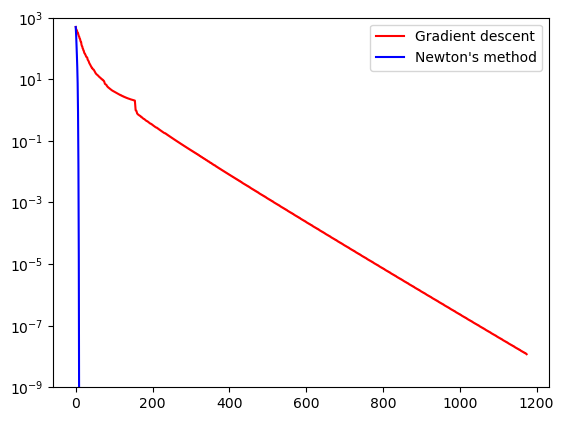

In [130]:
plot_error_iter(v_g, v_n[-1], "Gradient descent", color='r')
plot_error_iter(v_n, v_n[-1], "Newton's method")
plt.legend()
plt.yscale('log')
plt.ylim(1e-9,1e3)
plt.show()

In [131]:
v_g[-1], v_n[-1]

(522.5563605558971, 522.5563605440469)

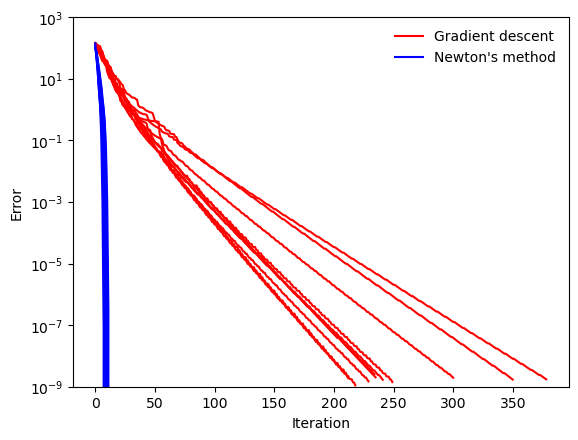

In [136]:
# Set the seed
np.random.seed(1)
for i in range(10):
    m = 1000
    n = 100

    A = np.random.randn(m, n)
    x0 = np.random.random(n)
    b = A.dot(x0) + np.random.random(m)
    c = np.random.randn(n)

    f = lambda x: c.dot(x)-np.sum(np.log(b-A.dot(x)))
    grad_f = lambda x: c+A.T.dot(1/(b-A.dot(x)))
    nabla_f = lambda x: A.T.dot(np.diag(1/(b-A.dot(x))**2)).dot(A)

    dom_f = lambda x: np.all(b-A.dot(x)>0)

    v_g = gradient_descent(f, grad_f, x0.copy(), A, b, dom_f, MAXITERS=2000, TOL=1e-8, alpha=0.001, beta=0.8, print_iter=False)
    v_n = newton(f, grad_f, nabla_f, x0.copy(), A, b, dom_f, MAXITERS=1000, TOL=1e-8, alpha=0.001, beta=0.8, print_iter=False)
    plot_error_iter(v_g, v_n[-1], "Gradient descent", color='r')
    plot_error_iter(v_n, v_n[-1], "Newton's method")

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.yscale('log')
plt.ylim(1e-9,1e3)
plt.legend(['Gradient descent', "Newton's method"],frameon=False)
plt.savefig('figure/gradient_descent_newton_%d_%d.png'%(m,n), dpi=300, bbox_inches='tight',transparent=True)
plt.show()